# Police Shooting Data Analysis

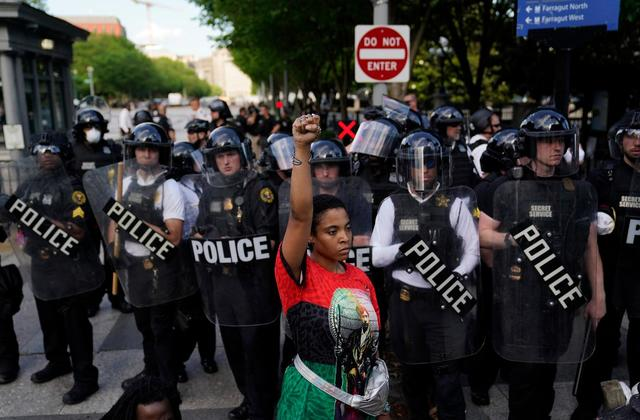

**Violent encounters with the police have profound effects on health, neighborhoods, life chances, and politics. Policing plays a key role in maintaining structural inequalities between people of color and white people in the United States. Police in the United States kill far more people than do police in other advanced industrial democracies.**

**In this task I'm gonna do basic EDA and visualizations on this dataset based on multiple factors such as racial bias, age and locations.**


**Table of Content:-**
* [Countplot of Male to Female victims ratio](#section-mf)
* [Race-wise distribution of victims of police shooting](#section-race)
* [State-wise distribution of victims of police shooting](#section-state)
* [Scraping and Mapping of full names of States (basic data manipulation)](#section-scraping)    
     
* [State-wise Race distribution of victims](#section-state-race) 
* [Year-wise Race distribution of victims](#section-year-race)
* [Cities with highest victims](#section-cities-high)
* [Victims Mental stability Piechart](#section-metal)
* [Fleeing/Not-fleeing distribution of victims](#section-flee)
* [Top 5 weapons with which victims were armed with](#section-armed)
* [Age-wise distribution of victims](#sections-age)



First, let's start with importing the required libraries

In [ ]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
shootings = pd.read_csv('../input/us-police-shootings/shootings.csv')

In [ ]:
shootings.head()

**Checking for any null values in the dataset**

In [ ]:
shootings.isna().any()

In [ ]:
shootings.gender.unique()

In [ ]:
shootings['gender'].replace(['M', 'F'], ['Male', 'Female'], inplace = True)

<a id="section-mf"></a>
# Creating a countplot of the Male & Female ratio of victims of Police shootings

In [ ]:
sns.countplot('gender', data = shootings)
plt.title('Male to Female Ratio of people shot by Police')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<a id="section-race"></a>
# Creating Race wise plot of the victims of Police shootings

In [ ]:
race_distri = shootings['race'].value_counts().reset_index()
race_distri.columns = ['race', 'Count']
race_distri.sort_values('Count', ascending = False, inplace = True)

In [ ]:
sns.barplot(x = 'race', y = 'Count', data = race_distri)
plt.title("Victim's race wise distribution")
plt.xlabel("Victim's Race")
plt.ylabel('Count')
plt.show()

<a id="section-state"></a>
# Creating State wise plot of the victims of Police shootings

In [ ]:
state_distri = shootings['state'].value_counts().reset_index()
state_distri.columns = ['state', 'Count']
state_distri.sort_values('Count', ascending = False, inplace = True)

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x='state', y = 'Count', data = state_distri)
plt.title('State wise count of victims shot by Police')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

<a id="section-scraping"></a>
**We see here that instead of the full name of the states, abbreviations are present. 
I'm gonna scrape the full names of the state with postal code from the infoplease webpage and then I'm gonna map them with the shootings dataframe**

In [ ]:
web = requests.get('https://www.infoplease.com/state-abbreviations-and-state-postal-codes')

dfs = pd.read_html(web.text)

In [ ]:
for df in dfs:
    print(df.head())

In [ ]:
#we only want the State/District territories so,
state_abbv = dfs[0]
state_abbv.head()

In [ ]:
state_abbv.set_index('Postal Code', inplace = True)
state_abbv.head()

In [ ]:
abbv_dict = state_abbv[['State/District']].to_dict()

abbv_dict = abbv_dict['State/District']

In [ ]:
abbv_dict

In [ ]:
shootings['state'] = [abbv_dict[c] for c in shootings.state]

In [ ]:
shootings.head()

<a id="section-state-race"></a>
# Now we're gonna create statewise race distribution of victims

In [ ]:
state_race_count = shootings[['state', 'race']]
state_race_count.head()

In [ ]:
state_race_count_1 = pd.DataFrame(state_race_count.groupby('state')['race'].value_counts())
state_race_count_1

In [ ]:
state_race_count_1.rename(columns = {'race' : 'Count'}, inplace = True)

In [ ]:
state_race_count_2 = state_race_count_1.reset_index()
state_race_count_2.rename(columns = {'race' : 'Race'}, inplace = True)
state_race_count_2.sort_values('state', ascending= False, inplace = True)

fig_state = px.bar(state_race_count_2, x="Count", y="state", color='Race', orientation='h',
             hover_data=["Race", "Count"], height=1200, width = 800)

fig_state.update_layout(title = {'text': "State wise distribution of victim's race",'y':0.99,
            'x':0.54, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Count",
        yaxis_title="state",
                     font=dict(
            family="Courier New, monospace",
            size=16,
            color="RebeccaPurple"
        ))
fig_state.show()

<a id="section-year-race"></a>
**We're gonna do the same thing as above for Year wise race distribution of the victims**

In [ ]:
shootings.head()

In [ ]:
shootings['Year'] = shootings['date'].str.split('-', n = 1,expand = True).drop(1, axis = 1)

In [ ]:
shootings.head()

In [ ]:
shootings.drop('date', axis = 1, inplace = True)

In [ ]:
shootings = shootings[['id', 'name', 'Year', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category']]

In [ ]:
year_race_count = shootings[['Year', 'race']]
year_race_count.head()

In [ ]:
year_race_count_1 = pd.DataFrame(year_race_count.groupby('Year')['race'].value_counts())
year_race_count_1.rename(columns = {'race' : 'Count'}, inplace = True)

In [ ]:
year_race_count_2 = year_race_count_1.reset_index()
year_race_count_2.rename(columns = {'race' : 'Race'}, inplace = True)
year_race_count_2.sort_values('Year', ascending = True, inplace = True)
fig_year = px.bar(year_race_count_2, x="Count", y="Year", color='Race', orientation='h',
             hover_data=["Race", "Count"],
             height=600, width = 700,
             title="Victim's Race distribution in the year ")

fig_year.update_layout(title = {'text': "Year wise distribution of victim's race",'y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Count",
        yaxis_title="Year",
                     font=dict(
            family="Courier New, monospace",
            size=16,
            color="RebeccaPurple"
        ))
fig_year.show()

<a id="section-cities-high"></a>
# Cities with highest victims of Police Shootings

In [ ]:
city_race_count = shootings[['city','race']]
city_race_count.head()

In [ ]:
city_race_count_3 = city_race_count.groupby('city')['race'].count().reset_index().sort_values('race', ascending=False).head(10)
city_race_count_3.rename(columns = {'race' : 'Count'}, inplace = True)

fig_city = px.bar(city_race_count_3, x="Count", y="city", color='city', orientation='h',
             hover_data=["Count", "city"],
             height=430, width = 700,
             )

fig_city.update_layout(title = {'text': "Top 10 cities with highest victims",'y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Count",
        yaxis_title="City",
                     font=dict(
            family="Courier New, monospace",
            size=16,
            color="RebeccaPurple"
        ))
fig_city.show()

<a id="section-metal"></a>
# We're gonna check how many of the victims were mentally ill

In [ ]:
mental_ill = shootings['signs_of_mental_illness'].value_counts().reset_index()
mental_ill.columns = ['Signs of mental illness', 'Count']

In [ ]:
fig_ill = px.pie(mental_ill, values='Count', names='Signs of mental illness', title='Signs of Mental Illness in victims', 
             width=500, height=500)
fig_ill.show()


# It seems like most of the victims were of sound mind

<a id="section-flee"></a>
# Fleeing/Not-fleeing distribution of victims

In [ ]:
type_of_flee = shootings['flee'].value_counts().reset_index()
type_of_flee.columns = ['Flee', 'Count']

In [ ]:
fig_flee = px.pie(type_of_flee, values='Count', names='Flee', title="Victim's fleeing distribution", 
             width=500, height=500)
fig_flee.show()

# Most of them were not fleeing either

<a id="section-armed"></a>
# Top 5 weapons with which the victims were armed with

In [ ]:
type_of_arm = shootings['armed'].value_counts().reset_index()
type_of_arm.columns = ['Armed with', 'Count']
type_of_arm = type_of_arm[type_of_arm['Armed with'] != 'unknown']

In [ ]:
fig_arm = px.bar(type_of_arm.head(5), x = 'Count', y = 'Armed with', color = 'Armed with',
                 width = 700, height = 350,hover_name= 'Armed with', orientation= 'h')

fig_arm.update_layout(title = {'text':"Victim's Top 5 Armed weapon distribution ",'y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Armed with",
        yaxis_title="Count",
                     font=dict(
            family="Courier New, monospace",
            size=15,
            color="RebeccaPurple"
        ))
fig_arm.show()

# We see here that around 2755 victims were armed with a gun which the cops might have found threatening, hence,some of these shootings could be self defence.

<a id="sections-age"></a>
# Age-wise distribution of victims

In [ ]:
shootings = shootings[shootings['age'] != 37.11793090137039]

In [ ]:
fig_age = px.histogram(shootings, x="age", color="age", width = 700, height = 350)
fig_age.update_layout(title = {'text':"Age wise distribution of victim",'y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Victim's Age",
        yaxis_title="Count",
                     font=dict(
            family="Courier New, monospace",
            size=15,
            color="RebeccaPurple"
        ))
fig_age.show()

# In this last visualization we can see that the histogram is right skewed and most of the victims are in the age group of 20 to 40.

# If you guys like my data analysis and vizualizations, don't forget to upvote :)